In [8]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import math 
import matplotlib.pyplot as plt
from multiprocessing import Pool 
from numpy.random import multivariate_normal
import time

In [9]:
K = 1
n = 10
M = np.array([0.2228, 0.1607, 0.1899, 0.1517, 0.1379, 0.1846, 0.1401, 0.1289, 0.183, 2.6526])
D = np.array([0.0332,0.076,0.0862,0.0838,0.0674,0.0862,0.0743,0.0716,0.1101,0.1333])
Ome = np.zeros(10)
Omee =  np.sum(Ome)/np.sum(D)
Ome0 = Ome-D*Omee
pi = math.pi
A = np.array([[0,2.484, 2.858, 2.372, 1.031, 0.222,2.13,13.057,3.676,7.834],
              [2.484,0,10.494,1.781,0.774,0.166,1.599,1.473,0.903,5.885],
              [2.858,10.494,0,2.522,1.096,0.236,2.264,1.729,1.144,4.772],
              [2.372,1.781,2.522,0,17.136,0.535,5.14,1.699,1.755,1.367],
              [1.031,0.774, 1.096,17.136,0 ,0.232, 2.235, 0.739, 0.763, 0.594],
              [0.222,0.166,0.236,0.535,0.232,0,1.574, 0.159, 0.164, 0.128],
              [2.13,1.599,2.264, 5.14, 2.235, 1.574, 0, 1.526, 1.576, 1.227],
              [13.057,1.473,1.729, 1.699,0.739, 0.159, 1.526, 0, 4.283, 4.159],
              [3.676, 0.903, 1.144, 1.755, 0.763, 0.164, 1.576, 4.283, 0, 1.37],
              [7.834, 5.885, 4.772, 1.367, 0.594, 0.128, 1.227, 4.159, 1.37 ,0]])

def normaldisturbances(initial,k,sigma):
    n = np.size(initial)
    cov = sigma*np.eye(n)
    mu = np.zeros(n)
    return multivariate_normal(mu,cov,k)
    
def violationcheck(x,checktimes,thres):
    n = np.shape(x)[1]
    tt = np.shape(x)[0]
    result = np.zeros(n)
    checkstep = tt//checktimes
    for i in range(n):
        for j in range(checktimes):
            if(np.abs(x[j*checkstep,i])>thres):
                result[i]=1
                break
    return result

def violationcheckglobal(x,checktimes,thres1,thres2):
    # to be written
    return [vcheckomega,vchecktheta,vcheckany]

def kuramoto2nd(X,t):
    theta = X[0:n]
    omega = X[n:2*n]
    dtheta = omega 
    matrix1 = np.repeat(np.reshape(theta,(1,n)),n,axis=0)
    matrix2 = np.transpose(matrix1)-matrix1
    sinmatrix  = np.sin(matrix2)
    domega = (1/M)*(-D*omega+Ome0-K*np.sum(np.multiply(sinmatrix, A),axis=1))
    return np.append(dtheta,domega)

def solkuramoto(sol0,dt):
    return odeint(kuramoto2nd,sol0,dt)

## Using different check times

Total time needed= 3.4e+01sec


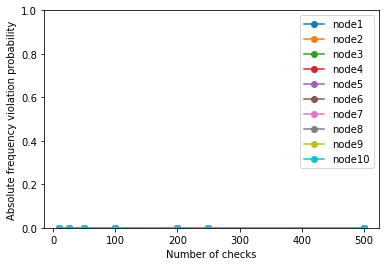

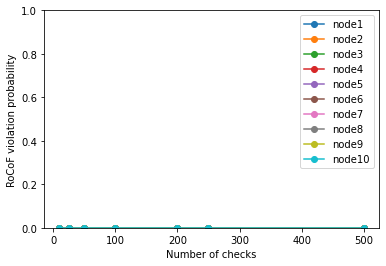

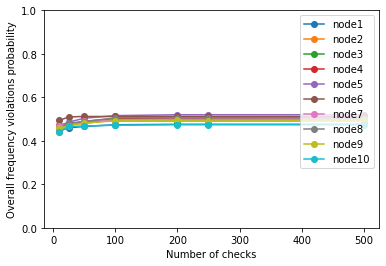

In [11]:
KK = 500 #repetition times
sigma = 0.05
epsilon1 = 0.35
epsilon2 = 0.5
t = 5
nn = 1000
dt = np.linspace(0, t, nn+1)

starttime = time.time()
disturb_norm = normaldisturbances(np.zeros(n),KK,sigma)
opt_checks = np.array([10,25,50,100,200,250,500])
num_checks = len(opt_checks)
vcheck_omega = np.zeros((num_checks,n))
vcheck_theta = np.zeros((num_checks,n))
vcheck_any = np.zeros((num_checks,n))

for k in range(KK):
    sol0 = np.pad(disturb_norm[k], (n,0), 'constant', constant_values=(0,0))
    vec_sol = solkuramoto(sol0,dt)
    sol_omega = vec_sol[:,n:2*n]
    sol_theta = vec_sol[:,0:n]
    for j in range(num_checks):
        temp_check_theta = violationcheck(sol_theta,opt_checks[j],epsilon1)
        temp_check_omega = violationcheck(sol_omega,opt_checks[j],epsilon2)
        vcheck_any[j] += np.maximum(temp_check_omega,temp_check_theta)
vcheck_omega = vcheck_omega/KK
vcheck_theta = vcheck_theta/KK
vcheck_any = vcheck_any/KK
    
stoptime = time.time()
totaltime = stoptime-starttime
print("Total time needed= {:2.2}sec".format(totaltime))

for i in range(n):
    plt.plot(opt_checks,vcheck_theta[:,i],'o-',label = 'node'+str(i+1))
plt.xlabel("Number of checks")
plt.ylabel("Absolute frequency violation probability")
plt.ylim(0, 1)
plt.legend()
plt.show()

for i in range(n):
    plt.plot(opt_checks,vcheck_omega[:,i],'o-',label = 'node'+str(i+1))
plt.xlabel("Number of checks")
plt.ylabel("RoCoF violation probability")
plt.ylim(0, 1)
plt.legend()
plt.show()

for i in range(n):
    plt.plot(opt_checks,vcheck_any[:,i],'o-',label = 'node'+str(i+1))
plt.xlabel("Number of checks")
plt.ylabel("Overall frequency violations probability")
plt.ylim(0, 1)
plt.legend();

## Plotting (the last) trajectory

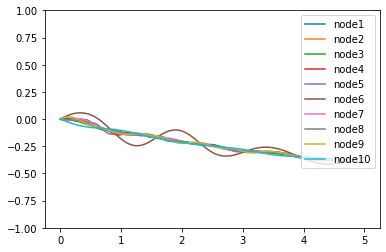

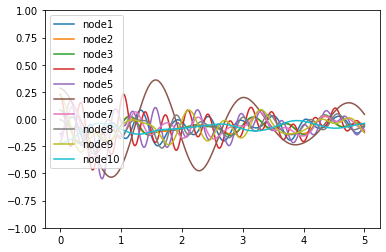

In [17]:
for i in range(n):
    plt.plot(dt,sol_theta[:,i],'-',label = 'node'+str(i+1))
plt.ylim(-1, 1)
plt.legend()
plt.show()

for i in range(n):
    plt.plot(dt,sol_omega[:,i],'-',label = 'node'+str(i+1))
plt.ylim(-1, 1)
plt.legend()
plt.show()